***Import necessary libraries***

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

***Load the data***

In [3]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


***Handling Missing Values***

In [7]:
df.isna().any()

Category    False
Message     False
dtype: bool

In [8]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
df['Message'].nunique()

5157

In [12]:
df.shape

(5572, 2)

In [13]:


df['Message'].drop_duplicates(inplace = True)
df.shape

(5572, 2)

***Class Distribution***

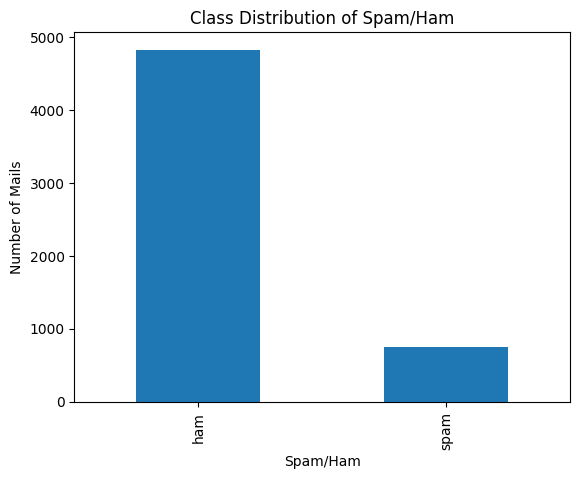

In [14]:
class_counts = df['Category'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

***Word Count***

In [15]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['Message'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [18]:
# Split the text into individual words
words = all_text.split()
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1469),
 ('u', 696),
 ('2', 457),
 ('call', 374),
 ('get', 326),
 ('U', 300),
 ('ur', 297),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 255),
 ('.', 241),
 ('go', 235),
 ('like', 224),
 ('know', 224),
 ('got', 204),
 ('come', 199),
 ('?', 187),
 ('...', 163),
 ('want', 158),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 142),
 ('n', 140),
 ("I'll", 138),
 ('How', 137),
 ('still', 135),
 ('If', 133),
 ('one', 133),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 117),
 ('see', 114),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('r', 113),
 ('back', 111),
 ('&', 111),
 ('home', 107),
 ('Ã¼', 105),
 ('tell', 104),
 ('Your', 104),
 ('day', 103),
 ('What', 102),
 ('take', 101),
 ('My', 101),
 ('dont', 100),
 ('free', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('The', 96),
 ('A', 96),
 ('mobile', 94),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('give', 89),
 ('phone', 88),
 (

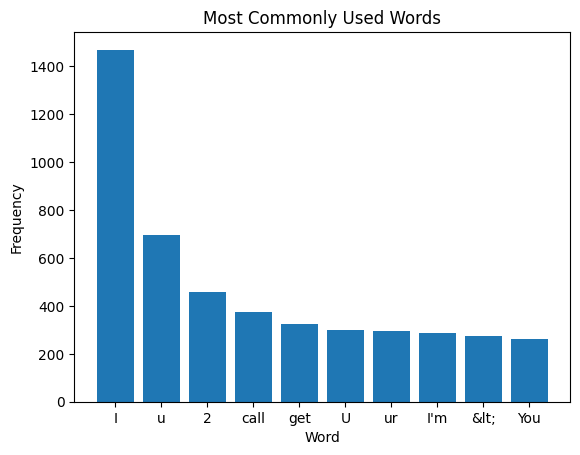

In [19]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

***NLP***

In [20]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['Message'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: user 11.7 s, sys: 1.28 s, total: 13 s
Wall time: 13.4 s


***Feature Extraction***

In [26]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['Category']
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Logistic Regression***

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9820627802690582


***Random Forest***

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# train a Random Forest Model
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# evaluate the classifier on the test set
y_pred1 = clf1.predict(X_test)
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [34]:

acc = accuracy_score(y_test, y_pred1)
print("Accuracy:", acc)

Accuracy: 0.9775784753363229


***Naive Bayes***

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
# train a Naive Bayes Model
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# evaluate the classifier on the test set
y_pred2 = clf2.predict(X_test)
y_pred2

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [38]:
acc = accuracy_score(y_test, y_pred2)
print("Accuracy:", acc)

Accuracy: 0.9757847533632287


***Confusion Matrix for Logistic Regression***

<Axes: >

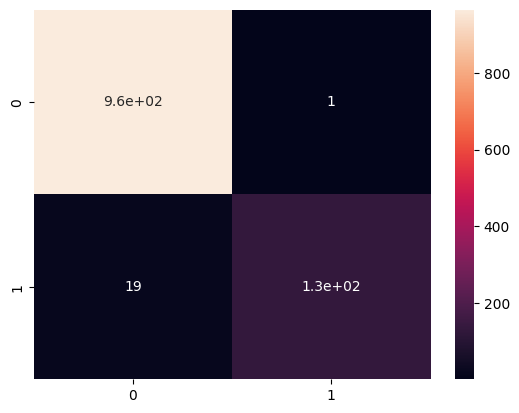

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)
